# **Project 3**, APS1070 Fall 2021
#### **PCA [10 marks]**
**Deadline: Nov 5th, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Ruijie Zhang
*   **Student number**: 1003812671



In this project we work on a Covid-19 dataset that reports the number  cases for different countries at the end of each day.

# Part 1: Getting started [1 Marks]

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)

In [ ]:
cases_raw.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921


In [ ]:
pd.DataFrame(cases_raw.columns)

,0
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
506,2021-06-11
507,2021-06-12
508,2021-06-13
509,2021-06-14


In [ ]:
import matplotlib.pyplot as plt

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.25]**

#### Step 1 time-series

In [ ]:
def plot_time_series(countries, df):
    df_trans = df.T
    fig, axes = plt.subplots(len(countries), 1)
    if len(countries) == 1:
         df_trans[countries[0]].plot(title = countries[0],figsize=(15,10))
    else:
        for index, country in enumerate(countries):
            df_trans[country].plot(title = country,figsize=(15,10),ax = axes[index])
# plot_time_series(['US', 'China', 'Canada'], cases_raw )

#### Step 2 StandardScalar

In [ ]:
import pandas as pd    
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
standard_df = pd.DataFrame(ss.fit_transform(cases_raw), columns = cases_raw.columns, index = cases_raw.index)

#### Step 3 example

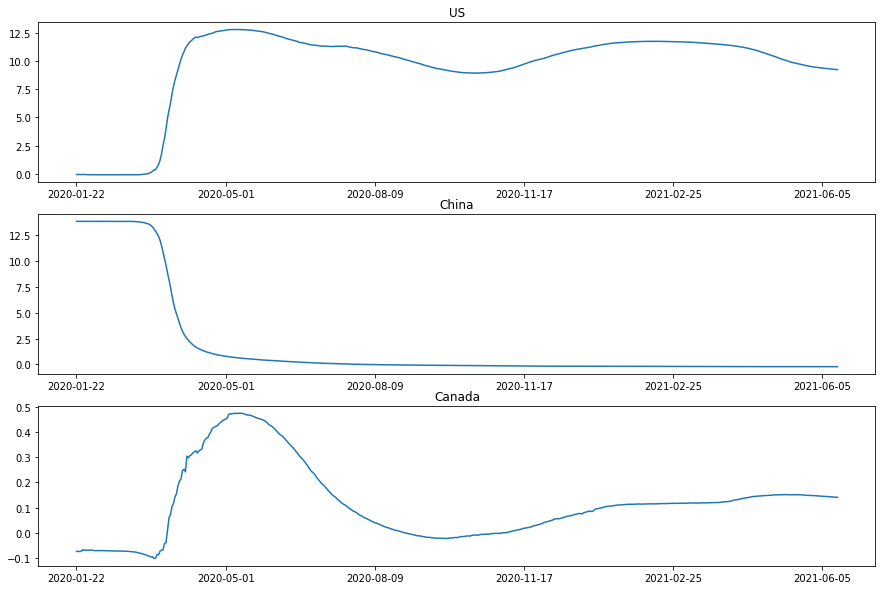

In [ ]:
plot_time_series(["US", "China", "Canada"], standard_df)

### Step 4 trends

###### US
The trendency of US goes dramatically up in the early time. Then it goes stable in the next months


###### China
The trendency of China in a high position at first. Then it goes down dramatically. Then it remains in the low volumes. 


###### Canada
The trendency of Canada climbs and reaches its peak in the May, then going down later.

When the number increases, it means there are more people injuring with COVID-19.
When the number decreases, it means there are less peole injuring with COVID-19.


The negative indicates the people recovery is more than the people injured with COVID-19



# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (511, 511).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

#### Step 1

In [ ]:
cases_raw.cov()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
2020-01-22,1.555831e+03,1.825503e+03,2.611850e+03,3.991601e+03,5.890830e+03,8.167722e+03,1.564021e+04,1.728107e+04,2.311249e+04,2.782803e+04,3.375871e+04,4.721324e+04,5.597461e+04,6.730546e+04,7.790380e+04,8.683841e+04,9.683964e+04,1.045164e+05,1.130762e+05,1.202437e+05,1.260127e+05,1.270711e+05,1.700440e+05,1.883925e+05,1.942257e+05,2.001868e+05,2.056391e+05,2.106828e+05,2.118399e+05,2.131392e+05,2.144804e+05,2.185968e+05,2.186521e+05,2.192700e+05,2.207223e+05,2.218853e+05,2.231064e+05,2.240250e+05,2.252225e+05,2.268340e+05,...,-1.886747e+06,-1.898205e+06,-1.907588e+06,-1.916604e+06,-1.927371e+06,-1.938454e+06,-1.948957e+06,-1.959371e+06,-1.968466e+06,-1.976434e+06,-1.984093e+06,-1.993152e+06,-2.002921e+06,-2.006782e+06,-2.015882e+06,-2.024291e+06,-2.031212e+06,-2.037770e+06,-2.045494e+06,-2.053754e+06,-2.061767e+06,-2.069005e+06,-2.076001e+06,-2.081644e+06,-2.087138e+06,-2.093821e+06,-2.100856e+06,-2.107921e+06,-2.113984e+06,-2.119718e+06,-2.124385e+06,-2.128953e+06,-2.134266e+06,-2.140316e+06,-2.146855e+06,-2.152886e+06,-2.158236e+06,-2.162623e+06,-2.167051e+06,-2.172418e+06
2020-01-23,1.825503e+03,2.141948e+03,3.064607e+03,4.683525e+03,6.911963e+03,9.583544e+03,1.835133e+04,2.027662e+04,2.711889e+04,3.265181e+04,3.961059e+04,5.539738e+04,6.567751e+04,7.897249e+04,9.140800e+04,1.018914e+05,1.136263e+05,1.226337e+05,1.326773e+05,1.410874e+05,1.478565e+05,1.490983e+05,1.995204e+05,2.210495e+05,2.278939e+05,2.348882e+05,2.412857e+05,2.472037e+05,2.485613e+05,2.500857e+05,2.516594e+05,2.564890e+05,2.565537e+05,2.572784e+05,2.589823e+05,2.603466e+05,2.617789e+05,2.628560e+05,2.642604e+05,2.661506e+05,...,-2.250595e+06,-2.264121e+06,-2.275193e+06,-2.285844e+06,-2.298555e+06,-2.311641e+06,-2.324056e+06,-2.336360e+06,-2.347103e+06,-2.356506e+06,-2.365580e+06,-2.376276e+06,-2.387813e+06,-2.392400e+06,-2.403149e+06,-2.413075e+06,-2.421245e+06,-2.428995e+06,-2.438113e+06,-2.447866e+06,-2.457340e+06,-2.465892e+06,-2.474149e+06,-2.480812e+06,-2.487291e+06,-2.495183e+06,-2.503488e+06,-2.511832e+06,-2.518990e+06,-2.525759e+06,-2.531265e+06,-2.536660e+06,-2.542932e+06,-2.550074e+06,-2.557788e+06,-2.564913e+06,-2.571225e+06,-2.576398e+06,-2.581630e+06,-2.587960e+06
2020-01-24,2.611850e+03,3.064607e+03,4.384766e+03,6.701058e+03,9.889434e+03,1.371185e+04,2.625647e+04,2.901112e+04,3.880079e+04,4.671711e+04,5.667346e+04,7.926063e+04,9.396905e+04,1.129910e+05,1.307833e+05,1.457826e+05,1.625724e+05,1.754600e+05,1.898301e+05,2.018629e+05,2.115478e+05,2.133246e+05,2.854666e+05,3.162697e+05,3.260624e+05,3.360696e+05,3.452229e+05,3.536901e+05,3.556325e+05,3.578137e+05,3.600655e+05,3.669761e+05,3.670691e+05,3.681067e+05,3.705449e+05,3.724976e+05,3.745484e+05,3.760913e+05,3.781034e+05,3.808097e+05,...,-3.081279e+06,-3.100437e+06,-3.116223e+06,-3.131411e+06,-3.149401e+06,-3.167913e+06,-3.185480e+06,-3.202994e+06,-3.218218e+06,-3.231563e+06,-3.244531e+06,-3.259667e+06,-3.275993e+06,-3.286159e+06,-3.301420e+06,-3.315518e+06,-3.327144e+06,-3.338197e+06,-3.351223e+06,-3.365055e+06,-3.378474e+06,-3.390605e+06,-3.402343e+06,-3.411835e+06,-3.421141e+06,-3.432327e+06,-3.444216e+06,-3.456007e+0

#### Step 2

In [132]:
from numpy import linalg as LA

In [146]:
def get_sorted_eigen(df_cov):
  eightval, eightvectors= np.linalg.eigh(df_cov)
  return eigntval, eigntvectors
  eightval, eightvectors = get_sorted_eigen(cases_raw.cov())

In [147]:
eightval

array([ 2.41904301e+15,  3.29942341e+14,  9.56584423e+11,  6.26634467e+11,
        3.94598407e+11,  3.40640442e+11,  8.56928567e+10,  5.19531239e+10,
        3.89203917e+10,  2.36822635e+10,  1.58499107e+10,  1.10922891e+10,
        8.19927072e+09,  4.38191577e+09,  3.60504415e+09,  2.03176816e+09,
        1.74373934e+09,  1.55158136e+09,  1.26087270e+09,  9.39197557e+08,
        7.52986635e+08,  6.43024263e+08,  5.55542357e+08,  3.93207880e+08,
        3.53797695e+08,  3.39483134e+08,  2.37913798e+08,  1.90379668e+08,
        1.55964790e+08,  1.21186478e+08,  1.00239746e+08,  9.45393840e+07,
        8.08518914e+07,  7.29202299e+07,  6.69177026e+07,  5.33157622e+07,
        4.88356125e+07,  4.50729607e+07,  3.49881394e+07,  3.36203432e+07,
        3.14046002e+07,  2.82224705e+07,  2.60111335e+07,  2.35205836e+07,
        2.08766756e+07,  1.93355478e+07,  1.60998780e+07,  1.56906860e+07,
        1.35159795e+07,  1.32931586e+07,  1.15930111e+07,  1.10899437e+07,
        8.83423271e+06,  

In [148]:
eightvectors

array([[-1.02856023e-08,  2.47873984e-08, -3.32641592e-07, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.23903279e-08,  2.89704005e-08, -3.84808989e-07, ...,
        -3.28285106e-01, -1.53755187e-01, -2.23329687e-01],
       [-1.68926826e-08,  4.35664925e-08, -6.57760770e-07, ...,
         1.06575073e-01,  1.67339396e-02, -6.57723748e-01],
       ...,
       [ 8.90803782e-02, -6.41374199e-02,  1.08719045e-01, ...,
        -1.07406599e-01,  5.19823628e-02,  5.70277686e-03],
       [ 8.91259244e-02, -6.41863177e-02,  1.10713365e-01, ...,
        -1.71567197e-02,  7.29405250e-02, -5.69366859e-02],
       [ 8.93036188e-02, -6.40330472e-02,  1.13772053e-01, ...,
         5.06268967e-02, -7.94984545e-02,  4.47179685e-02]])

In [149]:
args = (-eightval).argsort()
eightval = eightval[args]
eightvectors = eightvectors[:, args]

In [150]:
eigValSum = sum(eightval)
expVar = [eigV/eigValSum*100 for eigV in eightval]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 87.9153464 ,  99.90644992,  99.9412151 ,  99.96398889,
        99.97832979,  99.9907097 ,  99.99382403,  99.99571217,
        99.99712665,  99.99798734,  99.99856337,  99.9989665 ,
        99.99926448,  99.99942374,  99.99955475,  99.9996286 ,
        99.99969197,  99.99974836,  99.99979418,  99.99982831,
        99.99985568,  99.99987905,  99.99989924,  99.99991353,
        99.99992639,  99.99993873,  99.99994737,  99.99995429,
        99.99995996,  99.99996436,  99.99996801,  99.99997144,
        99.99997438,  99.99997703,  99.99997946,  99.9999814 ,
        99.99998318,  99.99998481,  99.99998609,  99.99998731,
        99.99998845,  99.99998947,  99.99999042,  99.99999127,
        99.99999203,  99.99999274,  99.99999332,  99.99999389,
        99.99999438,  99.99999487,  99.99999529,  99.99999569,
        99.99999601,  99.99999631,  99.99999659,  99.99999685,
        99.9999971 ,  99.99999731,  99.99999751,  99.99999768,
        99.99999785,  99.99999801,  99.99999815,  99.99

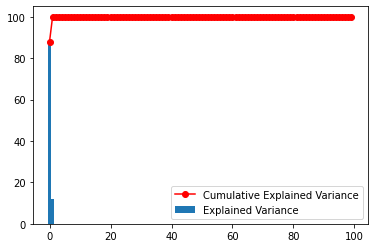

array([87.9153464 , 99.90644992, 99.9412151 , 99.96398889, 99.97832979,
       99.9907097 , 99.99382403, 99.99571217, 99.99712665, 99.99798734])

In [152]:
plt.bar(range(100), expVar[:100], label='Explained Variance')
plt.plot(cumExpVar[:100], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()
cumExpVar[:10]

#### Step 3

two components are needed for reach 99% of the dataset's variance

#### Step 4

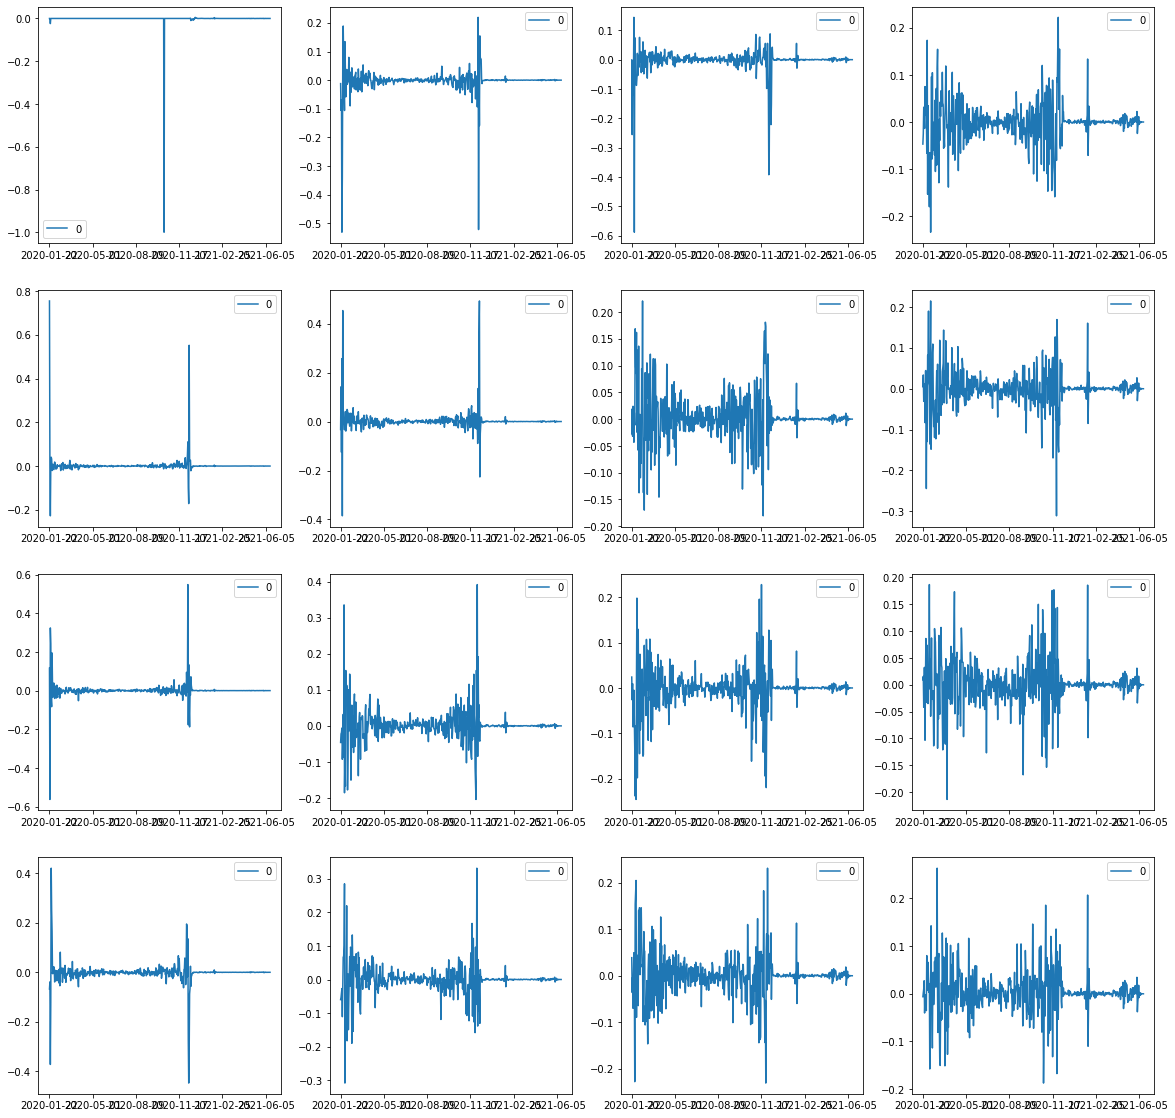

In [ ]:
eightval, eightvectors = get_sorted_eign(cases_raw.cov())
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
for i in range(16):
    df = pd.DataFrame(eightvectors[i], index = cases_raw.columns)
    df.plot(ax=axes[i%4, i // 4])
    

#### Step 5

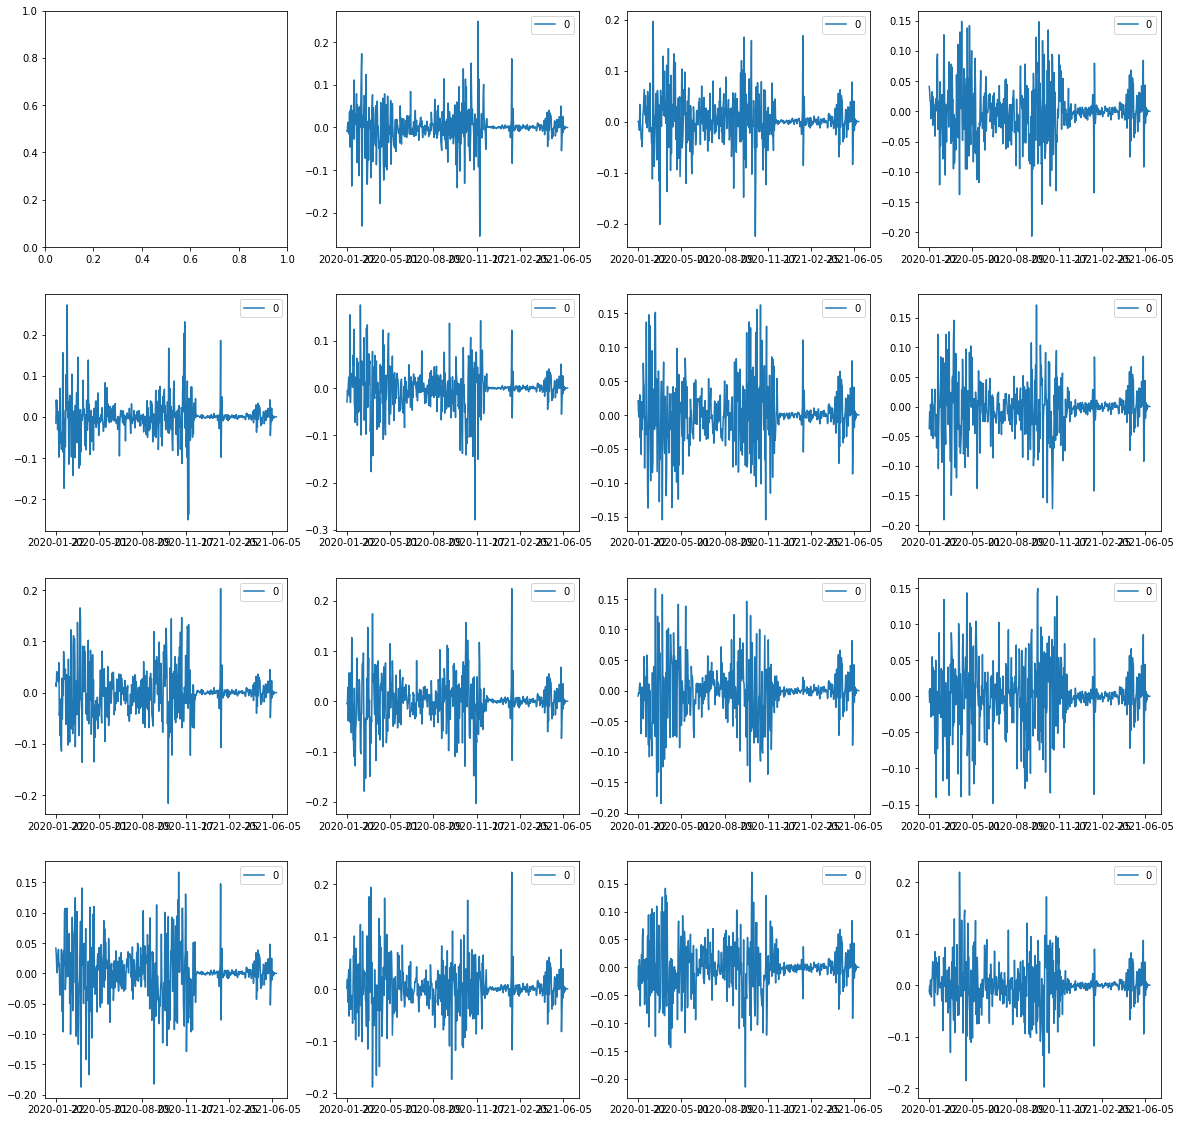

In [ ]:
eightval, eightvectors = get_sorted_eign(cases_raw.cov())
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
for i in range(17, 32):
    df = pd.DataFrame(eightvectors[i], index = cases_raw.columns)
    df.plot(ax=axes[ (i - 16)%4, (i - 16)// 4])

Compared to the previous 16 plots, the rest plots variances increase a lot.

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def pca_work(cases_raw, number, country, axes):
    ss = StandardScaler()
    standard_df = pd.DataFrame(ss.fit_transform(cases_raw), columns = cases_raw.columns, index = cases_raw.index)
    pca = PCA(number)
    X_pose = pca.fit_transform(standard_df)
    res = pca.inverse_transform(X_pose)
    res = ss.inverse_transform(res)
    res = pd.DataFrame(res, columns = cases_raw.columns, index = cases_raw.index )
    res = res.T
    res[country].plot(title = "reconstruction_plot_" + country, label = "PCA 1 to " + str(number), ax=axes[1])

def reconstruction_plot(origin_df, country, axes):
    pca_work(origin_df, 1, country, axes)
    pca_work(origin_df, 2, country, axes)
    pca_work(origin_df, 4, country, axes)
    pca_work(origin_df, 8, country, axes)
    pca_work(origin_df, 16, country, axes)

def residual_err(country, cases_raw, axes):
    ss = StandardScaler()
    standard_df = pd.DataFrame(ss.fit_transform(cases_raw), columns = cases_raw.columns, index = cases_raw.index)
    pca = PCA(16)
    X_pose = pca.fit_transform(standard_df)
    res = pca.inverse_transform(X_pose)
    res = ss.inverse_transform(res)
    res = pd.DataFrame(res, columns = cases_raw.columns, index = cases_raw.index )
    res = res.T
    res = cases_raw.T[country] - res[country]
    res.plot(title = "residual_err_" + country, label = "residual", ax=axes[2])

def RMSE(country, cases_raw, axes):
    components = range(1, 11)
    data_trans = cases_raw.T
    rmses = []
    for i in range(1, 11):
        ss = StandardScaler()
        standard_df = pd.DataFrame(ss.fit_transform(cases_raw), columns = cases_raw.columns, index = cases_raw.index)
        pca = PCA(i)
        X_pose = pca.fit_transform(standard_df)
        res = pca.inverse_transform(X_pose)
        res = ss.inverse_transform(res)
        res = pd.DataFrame(res, columns = cases_raw.columns, index = cases_raw.index )
        res = res.T
        rmse = mean_squared_error(res[country], data_trans[country], squared=False)
        rmses.append(rmse)
    plt.plot(list(range(1, 11)), rmses)    
    plt.show()

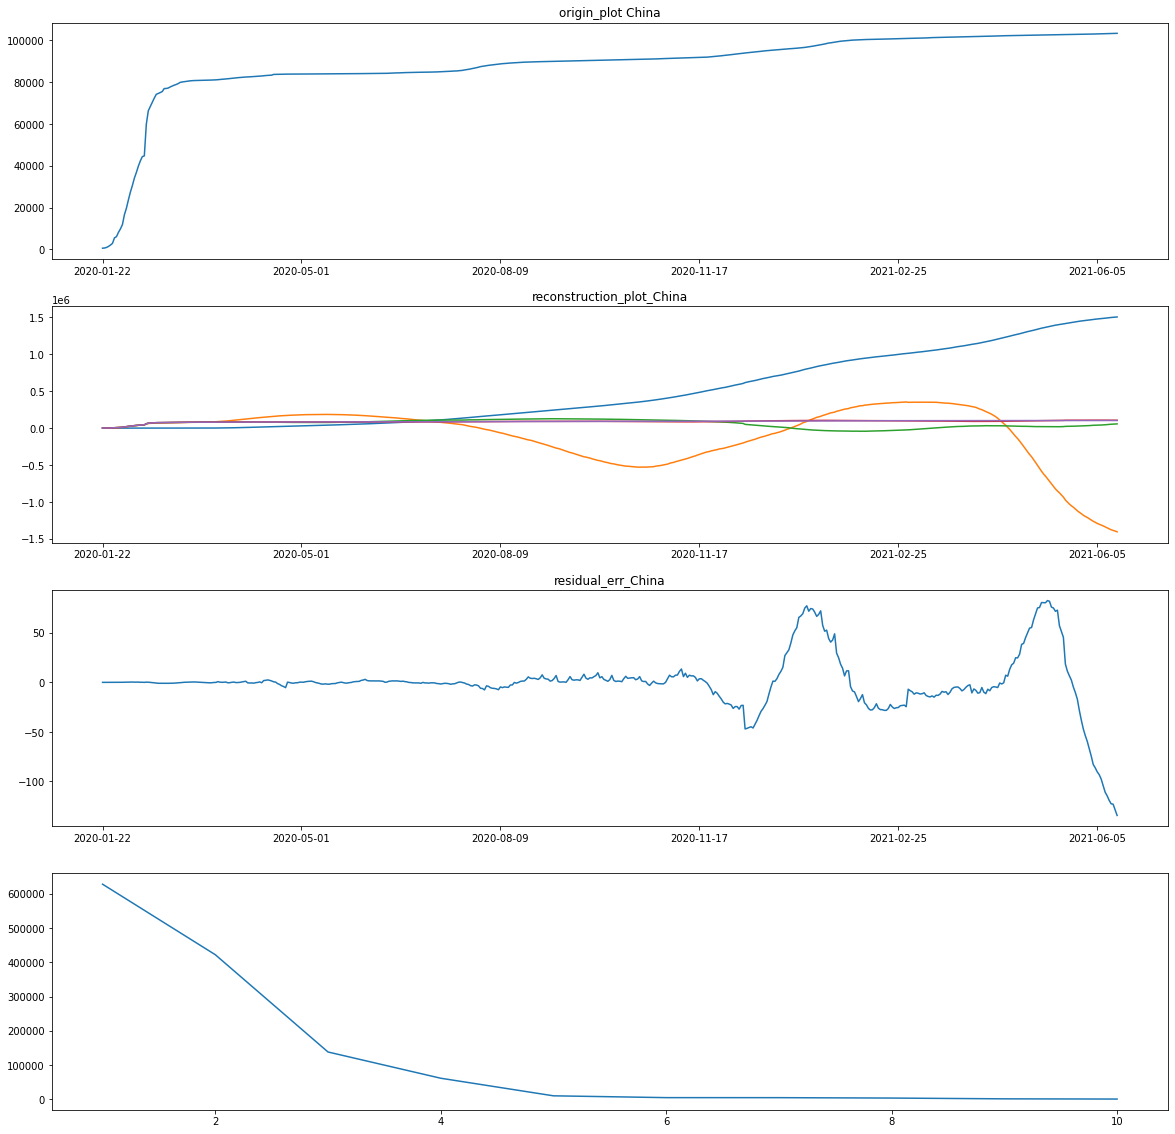

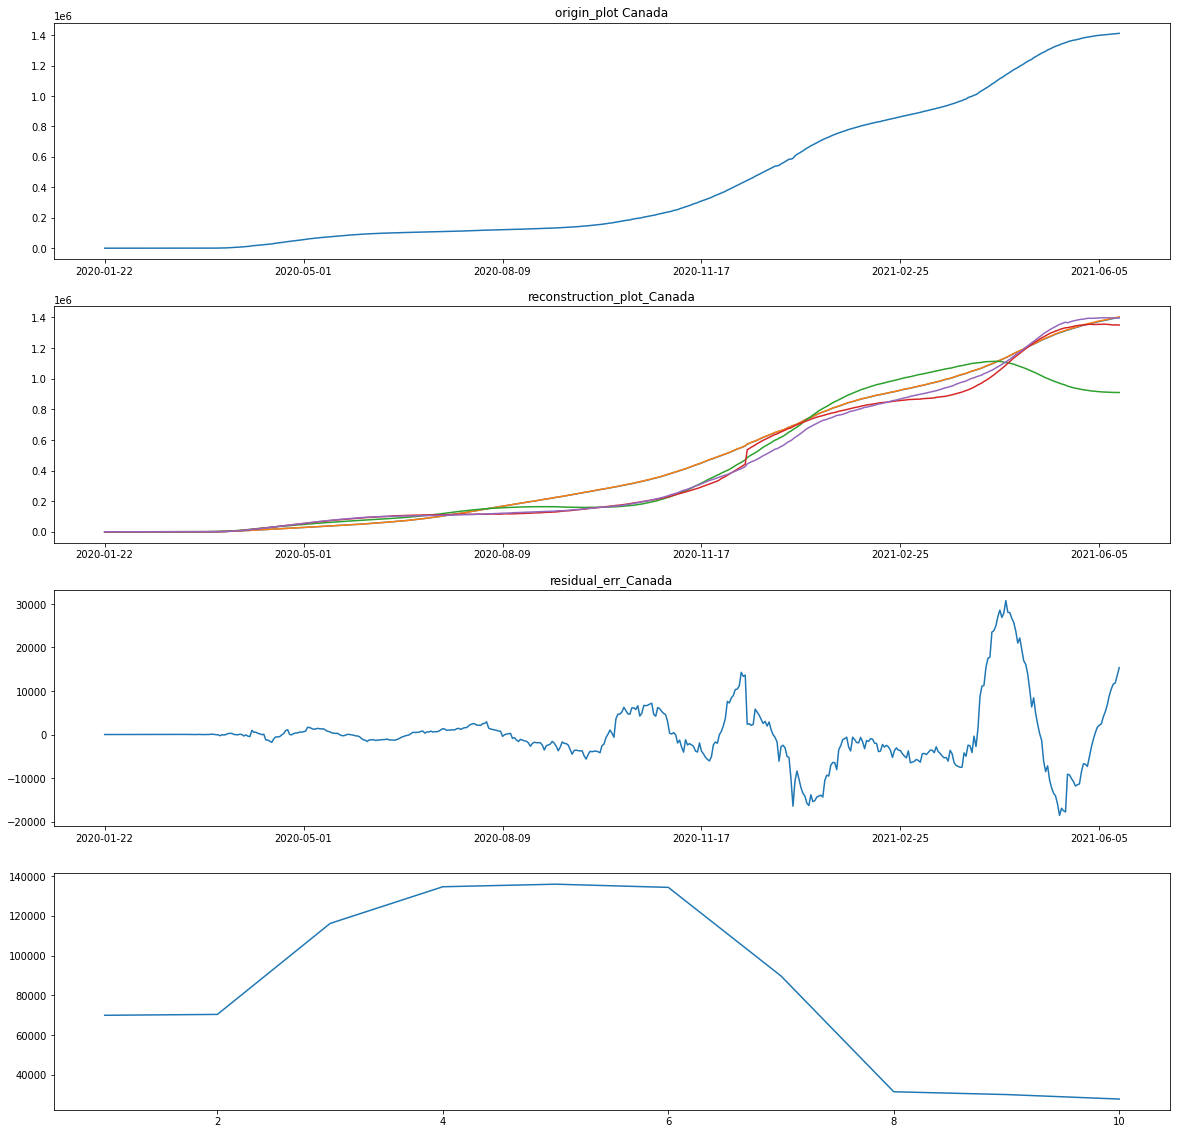

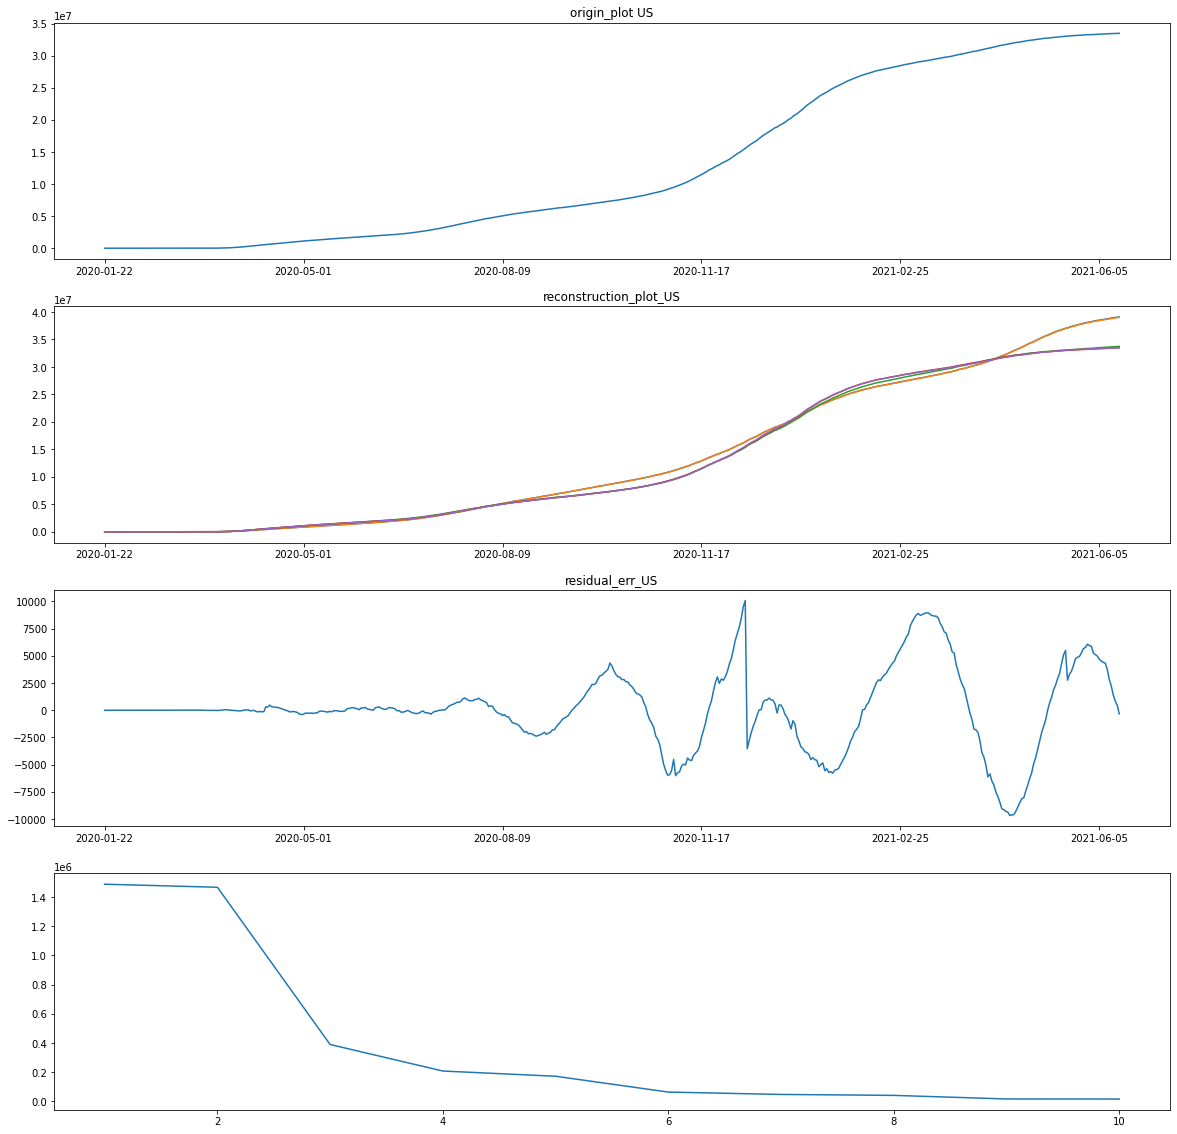

In [ ]:
from sklearn.decomposition import PCA
def data_recons(country, cases_raw):
    fig, axes = plt.subplots(nrows= 4, figsize=(20,20))
    cases_raw.T[country].plot(title = "origin_plot "+ country, ax=axes[0])
    reconstruction_plot(cases_raw, country, axes)
    residual_err(country, cases_raw, axes)
    RMSE(country, cases_raw, axes)
data_recons("China", cases_raw)
data_recons("Canada",cases_raw)
data_recons("US",cases_raw)

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. **[1]**



In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
def svd_work(cases_raw, number, country, axes):
    ss = StandardScaler()
    standard_df = pd.DataFrame(ss.fit_transform(cases_raw), columns = cases_raw.columns, index = cases_raw.index)
    svd = TruncatedSVD(n_components = number)
    X_pose = svd.fit_transform(standard_df)
    res = svd.inverse_transform(X_pose)
    res = ss.inverse_transform(res)
    res = pd.DataFrame(res, columns = cases_raw.columns, index = cases_raw.index )
    res = res.T
    res[country].plot(title = "reconstruction_plot_" + country, label = "PCA 1 to " + str(number), ax=axes[1])

def svd_reconstruction_plot(origin_df, country, axes):
    svd_work(origin_df, 1, country, axes)
    svd_work(origin_df, 2, country, axes)
    svd_work(origin_df, 4, country, axes)
    svd_work(origin_df, 8, country, axes)
    svd_work(origin_df, 16, country, axes)

def svd_residual_err(country, cases_raw, axes):
    ss = StandardScaler()
    standard_df = pd.DataFrame(ss.fit_transform(cases_raw), columns = cases_raw.columns, index = cases_raw.index)
    svd = TruncatedSVD(n_components = 16)
    X_pose = svd.fit_transform(standard_df)
    res = svd.inverse_transform(X_pose)
    res = ss.inverse_transform(res)
    res = pd.DataFrame(res, columns = cases_raw.columns, index = cases_raw.index )
    res = res.T
    res = cases_raw.T[country] - res[country]
    res.plot(title = "residual_err_" + country, label = "residual", ax=axes[2])

def svd_RMSE(country, cases_raw, axes):
    components = range(1, 11)
    data_trans = cases_raw.T
    rmses = []
    for i in range(1, 11):
        ss = StandardScaler()
        standard_df = pd.DataFrame(ss.fit_transform(cases_raw), columns = cases_raw.columns, index = cases_raw.index)
        svd = TruncatedSVD(n_components = i)
        X_pose = svd.fit_transform(standard_df)
        res = svd.inverse_transform(X_pose)
        res = ss.inverse_transform(res)
        res = pd.DataFrame(res, columns = cases_raw.columns, index = cases_raw.index )
        res = res.T
        rmse = mean_squared_error(res[country], data_trans[country], squared=False)
        rmses.append(rmse)
    plt.plot(list(range(1, 11)), rmses)    
    plt.show()


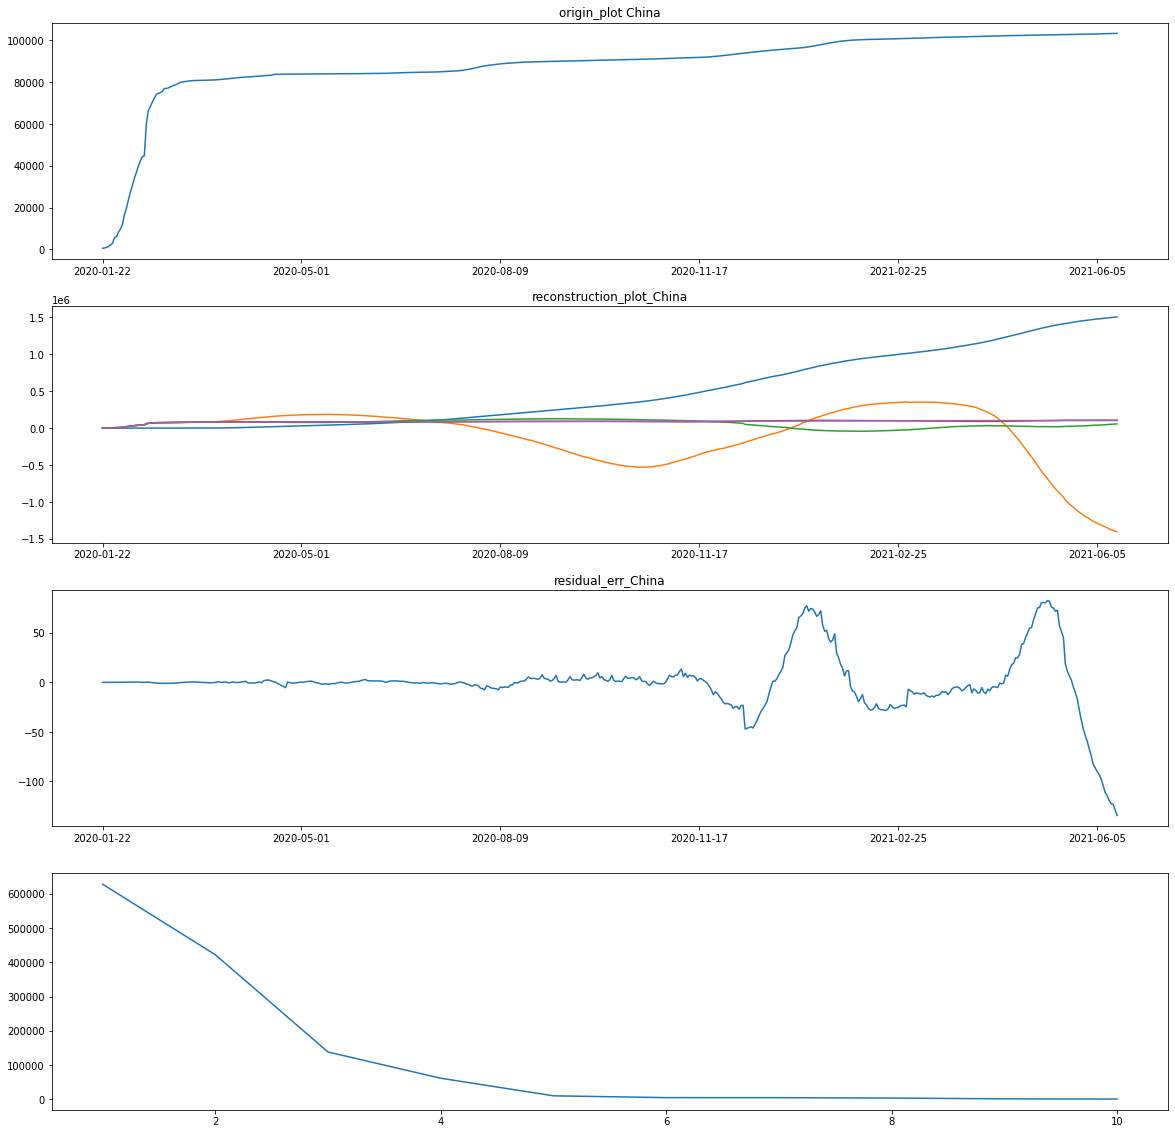

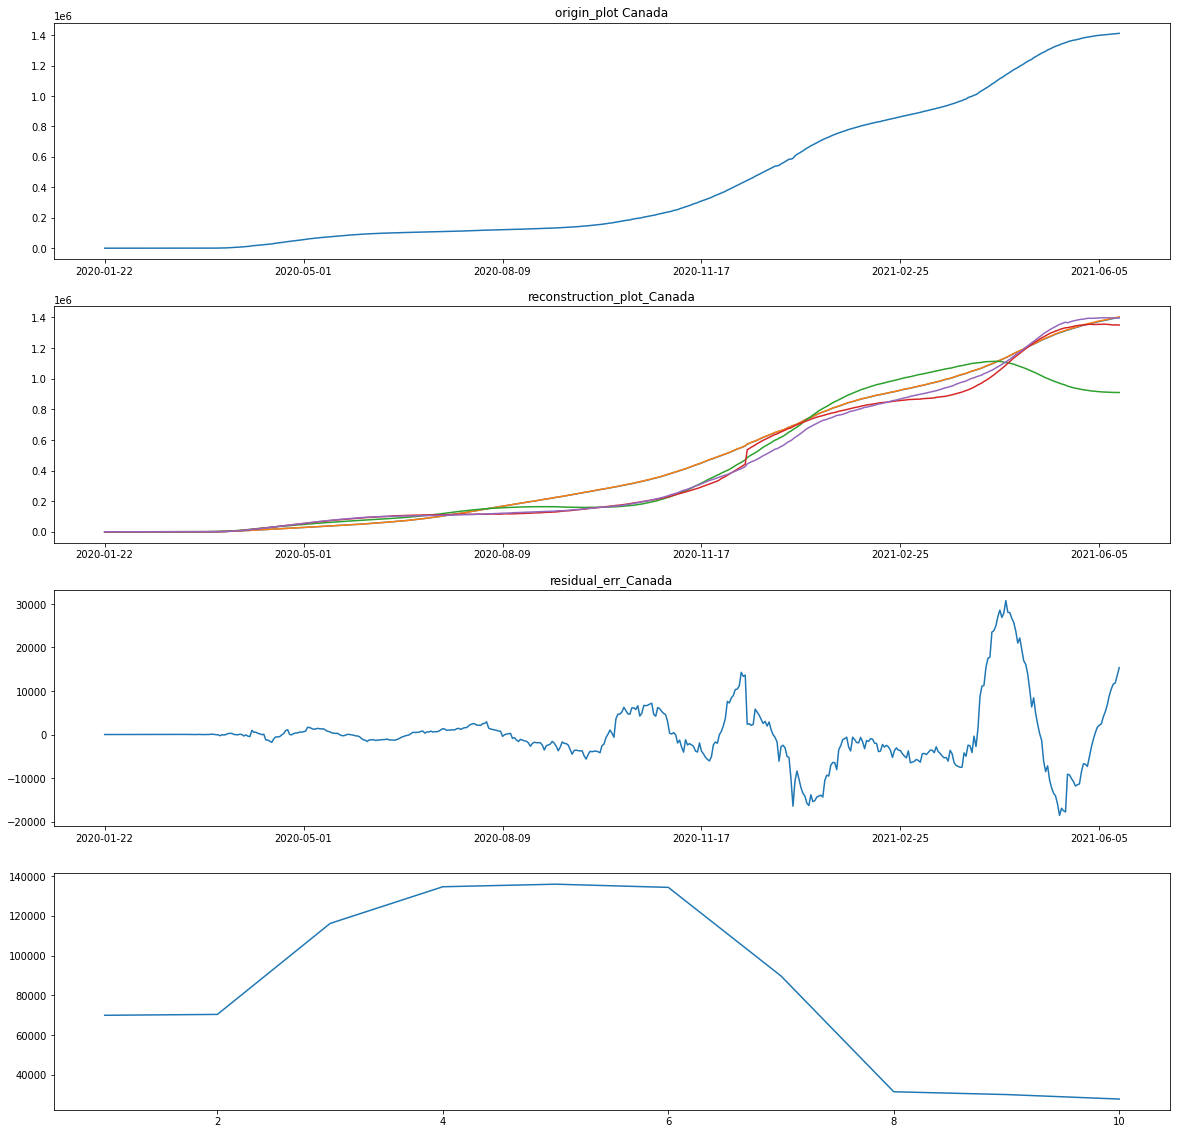

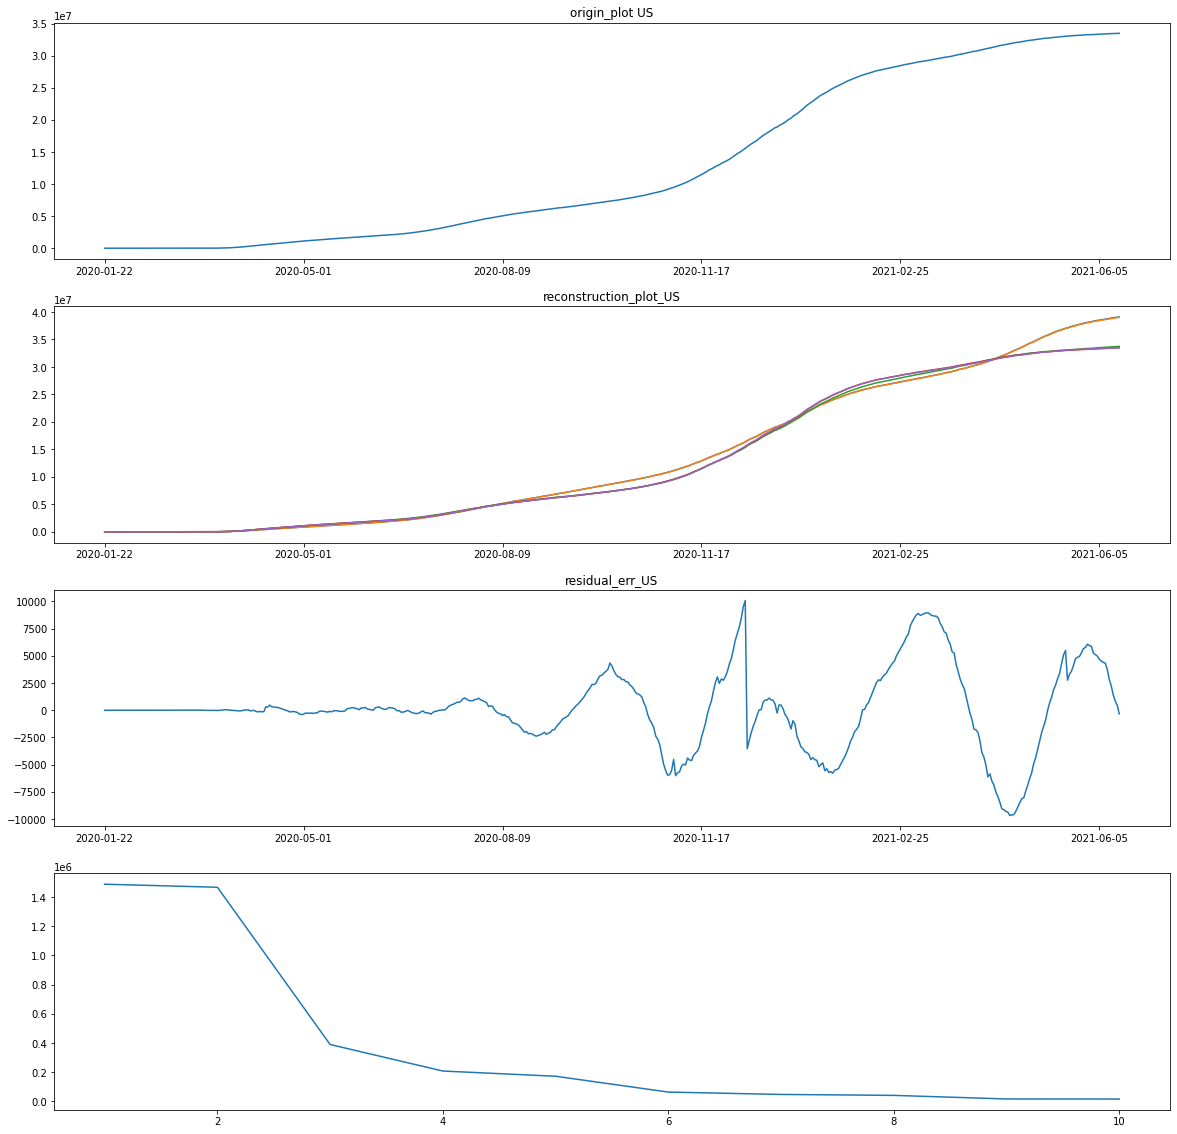

In [ ]:
def svc_recons(country, cases_raw):
    fig, axes = plt.subplots(nrows= 4, figsize=(20,20))
    cases_raw.T[country].plot(title = "origin_plot "+ country, ax=axes[0])
    svd_reconstruction_plot(cases_raw, country, axes)
    svd_residual_err(country, cases_raw, axes)
    svd_RMSE(country, cases_raw, axes)
    
svc_recons("China", cases_raw)
svc_recons("Canada",cases_raw)
svc_recons("US",cases_raw)

Result is similar. Or almost the same

# Part 5: Let's collect a more recent dataset! [2 Marks]
Create a more recent dataset similar to the one provided in your handout using the raw information provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). **[1]**

You need to manipulate the data to organize it in the desired format. You are free to use any tools you like, from Excel to Python!
 
In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. 


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. **[1]**


Don't forget to add your new CSV file to your GitHub repo. The code below helps you to upload your new CSV file to your colab session. 




In [ ]:
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving bigger.csv to bigger (1).csv


In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='bigger.csv',
    index_col=0,
    thousands=','
)

In [ ]:
cases_raw.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-16,2021-10-17,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30,2021-10-31,2021-11-01
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458


In [ ]:
pd.DataFrame(cases_raw.columns)

,0
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
645,2021-10-28
646,2021-10-29
647,2021-10-30
648,2021-10-31


In [ ]:
import matplotlib.pyplot as plt

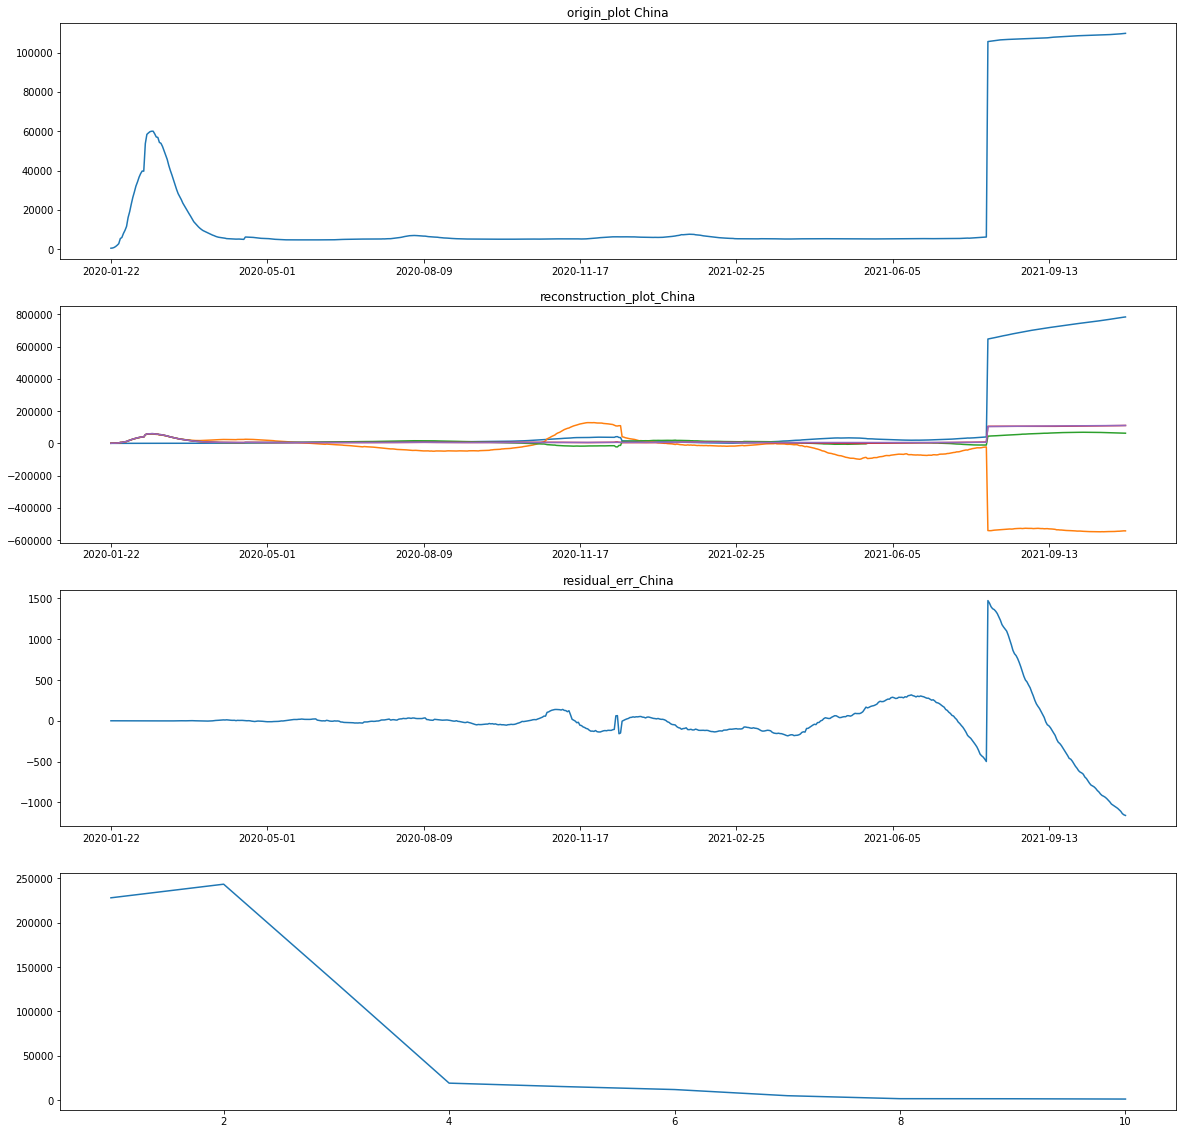

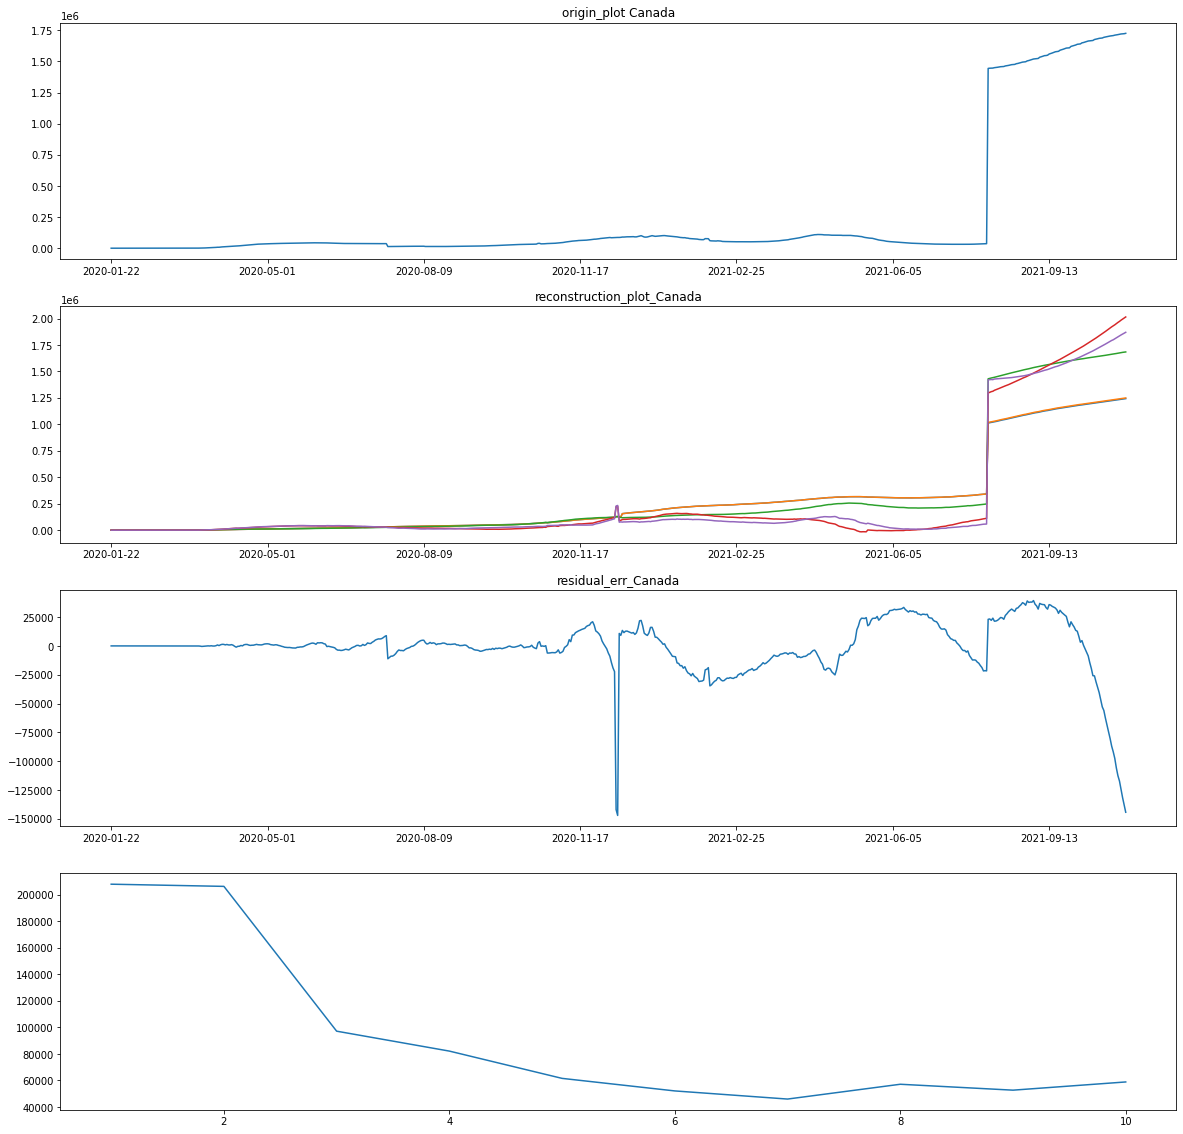

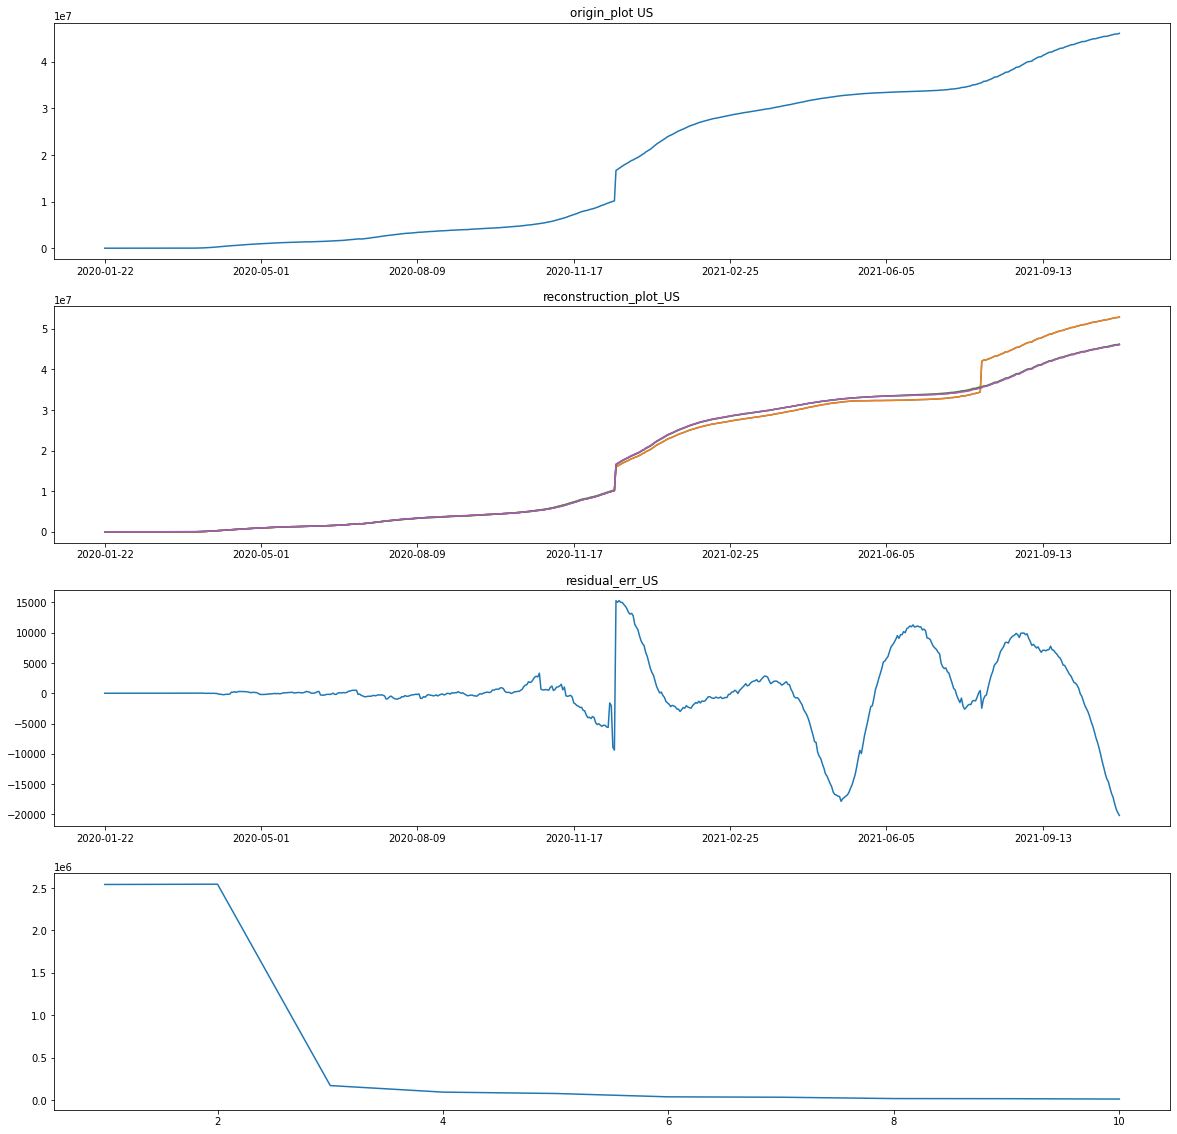

In [ ]:
svc_recons("China", cases_raw)
svc_recons("Canada",cases_raw)
svc_recons("US",cases_raw)

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

